In [67]:
# Paper Perfomace's study of a NaI detector for radioactive particle tracking
# Data treatment 
# By: Sebastián Sarasti

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

from d_funciones import netcount, spectrum, normalizar_exp, area,f_correcion, reso

In [69]:
# load experimental data
# cesium
cs_e={'5cm':np.loadtxt('./exp/DetectorNaI30mar21-Cs137-5cm-45min.TKA'),
      '10cm':np.loadtxt('./exp/DetectorNaI30mar21-Cs137-10cm-109min.TKA'),
      '15cm':np.loadtxt('./exp/DetectorNaI31mar21-Cs137-15cm-217min.TKA')}
# cobalt
co_e={'5cm':np.loadtxt('./exp/DetectorNaI30mar21-Co60-5cm-31min.TKA'),
      '10cm':np.loadtxt('./exp/DetectorNaI30mar21Co-60-10cm-72min.TKA'),
      '15cm':np.loadtxt('./exp/DetectorNaI31mar21-Co-60-15cm-141min.TKA')}
# europium
eu_e={'5cm':np.loadtxt('./exp/DetectorNaI30mar21Eu152-5cm-7min.TKA'),
      '10cm':np.loadtxt('./exp/DetectorNaI30mar21Eu152-10cm-18min.TKA'),
      '15cm':np.loadtxt('./exp/DetectorNaI31mar21-Eu152-15cm-39min.TKA')}
# americium
am_e={'5cm':np.loadtxt('./exp/DetectorNaI30mar21-Am241-5cm-8min.TKA'),
      '10cm':np.loadtxt('./exp/DetectorNaI30mar21-Am241-10cm-23min.TKA'),
      '15cm':np.loadtxt('./exp/DetectorNaI31mar21-Am241-15cm-51min.TKA')}

Text(0.05, 0.95, '$R^2=0.9999$\n$b=-11.8845$\n$m=0.2157$')

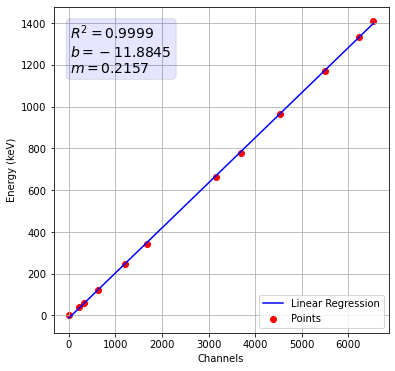

In [70]:
#create channels and convert them to energy
# getting calibration curve
energia_=np.array([ 0, 40,59.5 , 122, 245, 344, 662, 779, 964, 1173, 1332, 1408])#kev
ca=np.array([ 0 , 220, 327, 633, 1208, 1678, 3165, 3688, 4529, 5501, 6222, 6538])#channels
from scipy import stats
res = stats.linregress(ca, energia_)
# save values of regression as text
r2=res[2]
m_=res[0]
b_=res[1]
textstr = '\n'.join((
    r'$R^2=%.4f$' % (r2, ),
    r'$b=%.4f$' % (b_, ),
    r'$m=%.4f$' % (m_, )))
# plot results of regression
fig2=plt.figure(figsize=(6,6))
ax=plt.axes()
trans_ca=lambda x:res[0]*x+res[1]
plt.scatter(ca,energia_,color='r',label='Points')
plt.plot(ca,trans_ca(ca),color='b',label='Linear Regression')
plt.grid()
plt.xlabel('Channels')
plt.ylabel('Energy (keV)')
plt.legend(loc=4)
props = dict(boxstyle='round', facecolor='blue', alpha=0.1)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

In [71]:
# Afterwards, it was created a vector for it
canal=np.linspace(1,8190,8190)
Energy=np.array([((i*0.2157-11.88)*0.001) for i in canal])

In [72]:
# get net spectra
cs_e_n={'5cm':[],'10cm':[], '15cm':[]}
co_e_n={'5cm':[],'10cm':[], '15cm':[]}
eu_e_n={'5cm':[],'10cm':[], '15cm':[]}
am_e_n={'5cm':[],'10cm':[], '15cm':[]}
bk=np.loadtxt("./exp/DetectorNaI21oct20fondo2hFuer.txt")
for i in cs_e_n:
    cs_e_n[i]=netcount(cs_e[i],bk)
    co_e_n[i]=netcount(co_e[i],bk)
    eu_e_n[i]=netcount(eu_e[i],bk)
    am_e_n[i]=netcount(am_e[i],bk)

In [73]:
# verify that each dictionary is different
am_e_n['5cm']==cs_e_n['5cm']

array([False, False, False, ..., False, False, False])

In [74]:
# determination of theoretical activity per each source
import radioactivedecay as rd
from datetime import datetime, date, time, timedelta
import calendar
hl=[]
hl.append(rd.DEFAULTDATA.half_life('Cs-137','d'))
hl.append(rd.DEFAULTDATA.half_life('Eu-152','d'))
hl.append(rd.DEFAULTDATA.half_life('Co-60','d')) 
hl.append(rd.DEFAULTDATA.half_life('Am-241','d'))       
# Determination of days between the initial time and the date of the measurement are calculated
formato_fecha = "%d-%m-%Y"
# days for Cs137
fecha_inicial = datetime.strptime("01-05-2015",formato_fecha)
fecha_final = datetime.strptime("30-03-2021",formato_fecha)
diferencia=[]
diferencia.append(fecha_final - fecha_inicial)
# days for  Eu152
fecha_inicial = datetime.strptime("01-06-2015", formato_fecha)
fecha_final = datetime.strptime("30-03-2021",formato_fecha)
diferencia.append((fecha_final - fecha_inicial))
# days for Co60
fecha_inicial = datetime.strptime("01-06-2015",formato_fecha)
fecha_final = datetime.strptime("30-03-2021",formato_fecha)
diferencia.append((fecha_final - fecha_inicial))
# days for Am-241
fecha_inicial = datetime.strptime("01-04-1988", formato_fecha)
fecha_final = datetime.strptime("30-03-2021",formato_fecha)
diferencia.append((fecha_final - fecha_inicial))
# difference in days
diferencia=[diferencia[i].days for i in range(len(diferencia))]
# initial activities in uCi
act0=[0.25, 1, 1, 1.054]
# determination of final activities
actf=[act0[i]*np.exp(-np.log(2)*diferencia[i]/hl[i]) for i in range(len(act0))]   
actf=[actividad*37000 for actividad in actf]
activi=pd.Series(data=actf,index=("Cs-137","Eu-152","Co-60","Am-241") )

In [75]:
activi.head()

Cs-137     8074.740119
Eu-152    27452.299490
Co-60     17191.843702
Am-241    36988.049397
dtype: float64

In [76]:
# determination of theoretical gamma counts for each source
cs_t=actf[0]*0.8499
eu_t=actf[1]*0.2831
eu_t_1=actf[1]*0.0749
eu_t_2=actf[1]*0.266
co_t_1=actf[2]*0.9988
co_t_2=actf[2]*1
am_t=actf[3]*0.3592
cuentas_t=[]
cuentas_t.append(am_t)
cuentas_t.append(eu_t)
cuentas_t.append(eu_t_1)
cuentas_t.append(eu_t_2)
cuentas_t.append(cs_t)
cuentas_t.append(co_t_1)
cuentas_t.append(co_t_2)

In [77]:
# determination of area below each photopeak
areas=pd.DataFrame(columns=['Cs-137', 'Eu-152', 'Co-60 1.17 MeV', 'Co-60 1.33 MeV','Am-241'], index=range(3))
a_cs137=[area(cs_e_n[i],Energy,2800,3600) for i in cs_e_n]
a_eu152=[area(eu_e_n[i],Energy,550,700) for i in eu_e_n]
a_eu152_1=[area(eu_e_n[i],Energy,1100,1300) for i in eu_e_n]
a_eu152_2=[area(eu_e_n[i],Energy,1500,1900) for i in eu_e_n]
a_co60_1=[area(co_e_n[i],Energy,5100,5800) for i in co_e_n]
a_co60_2=[area(co_e_n[i],Energy,5800,6600) for i in co_e_n]
a_am241=[area(am_e_n[i],Energy,250,400) for i in am_e_n]
areas['Cs-137']= a_cs137
areas['Eu-152']= a_eu152
areas['Co-60 1.17 MeV']= a_co60_1
areas['Co-60 1.33 MeV']= a_co60_2
areas['Am-241']=a_am241

In [78]:
areas.head()

,Cs-137,Eu-152,Co-60 1.17 MeV,Co-60 1.33 MeV,Am-241
0,0.044349,0.126200,0.061512,0.051224,0.232881
1,0.016729,0.047339,0.023968,0.019997,0.077336
2,0.008731,0.024100,0.012552,0.010509,0.037211


In [79]:
# save in a matrix the theoretical counts
cuentas_d=np.zeros((3,7))
for i in range(3):
    cuentas_d[i,0]=a_am241[i] #primera columna cuentas para el am-241
    cuentas_d[i,1]=a_eu152[i] #primera columna cuentas para el eu-152
    cuentas_d[i,2]=a_eu152_1[i] #primera columna cuentas para el eu-152
    cuentas_d[i,3]=a_eu152_2[i] #primera columna cuentas para el eu-152
    cuentas_d[i,4]=a_cs137[i] #primera columna cuentas para el cs137
    cuentas_d[i,5]=a_co60_1[i] #primera columna cuentas para el co-60 1.17 MeV
    cuentas_d[i,6]=a_co60_2[i] #primera columna cuentas para el co-60 1.3 MeV

In [80]:
# create a matrix for efficiencies
eficiencia=np.zeros((3,7))
for j in range(len(cuentas_t)):
    for i in range(cuentas_d.shape[0]):
        eficiencia[i,j]=(cuentas_d[i,j]/cuentas_t[j])*100  
# create a dataframe with efficiencies
efi=pd.DataFrame(columns=("Am-241 59 keV","Eu-152 121 keV", "Eu-152 244 keV", "Eu-152 344 keV", "Cs-137 662 keV", "Co-60 1.17 MeV", "Co-60 1.33 MeV"))
efi["Am-241 59 keV"]=eficiencia[:,0]
efi["Eu-152 121 keV"]=eficiencia[:,1]
efi["Eu-152 244 keV"]=eficiencia[:,2]
efi["Eu-152 344 keV"]=eficiencia[:,3]
efi["Cs-137 662 keV"]=eficiencia[:,4]
efi["Co-60 1.17 MeV"]=eficiencia[:,5]
efi["Co-60 1.33 MeV"]=eficiencia[:,6]

In [81]:
efi.head()

,Am-241 59 keV,Eu-152 121 keV,Eu-152 244 keV,Eu-152 344 keV,Cs-137 662 keV,Co-60 1.17 MeV,Co-60 1.33 MeV
0,0.001753,0.001624,0.001639,0.001263,0.000646,0.000358,0.000298
1,0.000582,0.000609,0.000673,0.000473,0.000244,0.000140,0.000116
2,0.000280,0.000310,0.000359,0.000242,0.000127,0.000073,0.000061


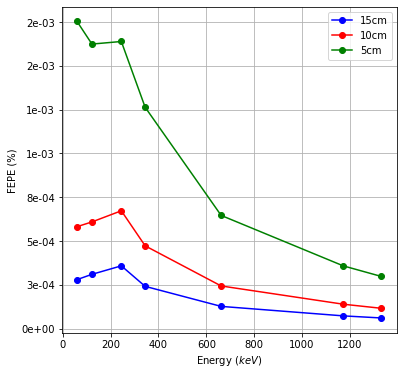

In [82]:
# plot FEPE vs energy
import matplotlib.ticker as mtick
e_cab=[59.5, 121.78,244.69,344.28,662, 1173, 1332]
fig1=plt.figure(figsize=(6,6))
ax1=plt.axes()
ax1.plot(e_cab,eficiencia[2,:],'o-b', label='15cm')
ax1.plot(e_cab,eficiencia[1,:],'o-r', label='10cm')
ax1.plot(e_cab,eficiencia[0,:],'o-g', label='5cm')
plt.legend()
ax1.set_ylabel("FEPE (%)")
ax1.set_xlabel("Energy $(keV)$")
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.e'))
#plt.title("Curva de calibración de eficiencias")
ax1.grid()

In [83]:
# load simulated data

# cesium
cs_s={'5cm':np.loadtxt('./NaI_new_results/'+'NaIDetector_cs137_1.dat'),
      '10cm':np.loadtxt('./NaI_new_results/'+'NaIDetector_cs137_2.dat'),
      '15cm':np.loadtxt('./NaI_new_results/'+'NaIDetector_cs137_3.dat')}
# cobalt
co_s={'5cm':np.loadtxt('./NaI_new_results/'+'NaIDetector_co60_1.dat'),
      '10cm':np.loadtxt('./NaI_new_results/'+'NaIDetector_co60_2.dat'),
      '15cm':np.loadtxt('./NaI_new_results/'+'NaIDetector_co60_3.dat')}
# americium
am_s={'5cm':np.loadtxt('./NaI_new_results/'+'NaIDetector_am241_1.dat'),
      '10cm':np.loadtxt('./NaI_new_results/'+'NaIDetector_am241_2.dat'),
      '15cm':np.loadtxt('./NaI_new_results/'+'NaIDetector_am241_3.dat')}
#europium
eu_s1={'5cm':np.loadtxt('./NaI_new_results/'+'NaIDetector_eu152p1_1.dat'),
      '10cm':np.loadtxt('./NaI_new_results/'+'NaIDetector_eu152p1_2.dat'),
      '15cm':np.loadtxt('./NaI_new_results/'+'NaIDetector_eu152p1_3.dat')}
eu_s2={'5cm':np.loadtxt('./NaI_new_results/'+'NaIDetector_eu152p2_1.dat'),
      '10cm':np.loadtxt('./NaI_new_results/'+'NaIDetector_eu152p2_2.dat'),
      '15cm':np.loadtxt('./NaI_new_results/'+'NaIDetector_eu152p2_3.dat')}
eu_s3={'5cm':np.loadtxt('./NaI_new_results/'+'NaIDetector_eu152p3_1.dat'),
      '10cm':np.loadtxt('./NaI_new_results/'+'NaIDetector_eu152p3_2.dat'),
      '15cm':np.loadtxt('./NaI_new_results/'+'NaIDetector_eu152p3_3.dat')}

In [84]:
"""
for key in cs_s:
    cs_s[key]=reso(cs_s[key],0.026)
    co_s[key]=reso(co_s[key],0.032)
    am_s[key]=reso(am_s[key],0.005)
    eu_s1[key]=reso(eu_s1[key],0.008)
    eu_s2[key]=reso(eu_s2[key],0.015)
    eu_s3[key]=reso(eu_s3[key],0.02)
"""

'\nfor key in cs_s:\n    cs_s[key]=reso(cs_s[key],0.026)\n    co_s[key]=reso(co_s[key],0.032)\n    am_s[key]=reso(am_s[key],0.005)\n    eu_s1[key]=reso(eu_s1[key],0.008)\n    eu_s2[key]=reso(eu_s2[key],0.015)\n    eu_s3[key]=reso(eu_s3[key],0.02)\n'

In [85]:
"""
data_s_sm=np.zeros((18,3000))
# add cesium
data_s_sm[0,0:1500]= cs_s['5cm'][0];data_s_sm[0,1500:3000]= cs_s['5cm'][1]
data_s_sm[1,0:1500]= cs_s['10cm'][0];data_s_sm[1,1500:3000]= cs_s['10cm'][1]
data_s_sm[2,0:1500]= cs_s['15cm'][0];data_s_sm[2,1500:3000]= cs_s['15cm'][1]
# add co
data_s_sm[3,0:1500]= co_s['5cm'][0];data_s_sm[3,1500:3000]= co_s['5cm'][1]
data_s_sm[4,0:1500]= co_s['10cm'][0];data_s_sm[4,1500:3000]= co_s['10cm'][1]
data_s_sm[5,0:1500]= co_s['15cm'][0];data_s_sm[5,1500:3000]= co_s['15cm'][1]
# add americium
data_s_sm[6,0:1500]= am_s['5cm'][0];data_s_sm[6,1500:3000]= am_s['5cm'][1]
data_s_sm[7,0:1500]= am_s['10cm'][0];data_s_sm[7,1500:3000]= am_s['10cm'][1]
data_s_sm[8,0:1500]= am_s['15cm'][0];data_s_sm[8,1500:3000]= am_s['15cm'][1]
# add europium
data_s_sm[9,0:1500]= eu_s1['5cm'][0];data_s_sm[9,1500:3000]= eu_s1['5cm'][1]
data_s_sm[10,0:1500]= eu_s1['10cm'][0];data_s_sm[10,1500:3000]= eu_s1['10cm'][1]
data_s_sm[11,0:1500]= eu_s1['15cm'][0];data_s_sm[11,1500:3000]= eu_s1['15cm'][1]
data_s_sm[12,0:1500]= eu_s2['5cm'][0];data_s_sm[12,1500:3000]= eu_s2['5cm'][1]
data_s_sm[13,0:1500]= eu_s2['10cm'][0];data_s_sm[13,1500:3000]= eu_s2['10cm'][1]
data_s_sm[14,0:1500]= eu_s2['15cm'][0];data_s_sm[14,1500:3000]= eu_s2['15cm'][1]
data_s_sm[15,0:1500]= eu_s3['5cm'][0];data_s_sm[15,1500:3000]= eu_s3['5cm'][1]
data_s_sm[16,0:1500]= eu_s3['10cm'][0];data_s_sm[16,1500:3000]= eu_s3['10cm'][1]
data_s_sm[17,0:1500]= eu_s3['15cm'][0];data_s_sm[17,1500:3000]= eu_s3['15cm'][1]
# save the data in a csv like as pandas

j=pd.DataFrame(data_s_sm)
j.to_csv('res_hist_2.csv',index=False)
"""

"\ndata_s_sm=np.zeros((18,3000))\n# add cesium\ndata_s_sm[0,0:1500]= cs_s['5cm'][0];data_s_sm[0,1500:3000]= cs_s['5cm'][1]\ndata_s_sm[1,0:1500]= cs_s['10cm'][0];data_s_sm[1,1500:3000]= cs_s['10cm'][1]\ndata_s_sm[2,0:1500]= cs_s['15cm'][0];data_s_sm[2,1500:3000]= cs_s['15cm'][1]\n# add co\ndata_s_sm[3,0:1500]= co_s['5cm'][0];data_s_sm[3,1500:3000]= co_s['5cm'][1]\ndata_s_sm[4,0:1500]= co_s['10cm'][0];data_s_sm[4,1500:3000]= co_s['10cm'][1]\ndata_s_sm[5,0:1500]= co_s['15cm'][0];data_s_sm[5,1500:3000]= co_s['15cm'][1]\n# add americium\ndata_s_sm[6,0:1500]= am_s['5cm'][0];data_s_sm[6,1500:3000]= am_s['5cm'][1]\ndata_s_sm[7,0:1500]= am_s['10cm'][0];data_s_sm[7,1500:3000]= am_s['10cm'][1]\ndata_s_sm[8,0:1500]= am_s['15cm'][0];data_s_sm[8,1500:3000]= am_s['15cm'][1]\n# add europium\ndata_s_sm[9,0:1500]= eu_s1['5cm'][0];data_s_sm[9,1500:3000]= eu_s1['5cm'][1]\ndata_s_sm[10,0:1500]= eu_s1['10cm'][0];data_s_sm[10,1500:3000]= eu_s1['10cm'][1]\ndata_s_sm[11,0:1500]= eu_s1['15cm'][0];data_s_sm[11,1

In [86]:
# unlocked the other cells, in case that you want to make all the data treatment, once I did
# I exported the results such as csv, in order to reduce computer time and avoid repeat calculations
data_s_smooth=pd.read_csv('res_hist_2.csv')
data_s_smooth

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0.0,0.001334,0.002668,0.004003,0.005337,0.006671,0.008005,0.00934,0.010674,0.012008,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.001334,0.002668,0.004003,0.005337,0.006671,0.008005,0.00934,0.010674,0.012008,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.001334,0.002668,0.004003,0.005337,0.006671,0.008005,0.00934,0.010674,0.012008,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.001334,0.002668,0.004003,0.005337,0.006671,0.008005,0.00934,0.010674,0.012008,...,45.815165,44.696548,43.527467,42.310132,41.047330,39.742394,38.399179,37.022011,35.615645,34.185200
4,0.0,0.001334,0.002668,0.004003,0.005337,0.006671,0.008005,0.00934,0.010674,0.012008,...,6.699146,6.431163,6.160105,5.887119,5.613346,5.339903,5.067879,4.798323,4.532234,4.270556
5,0.0,0.001334,0.002668,0.004003,0.005337,0.006671,0.008005,0.00934,0.010674,0.012008,...,0.711150,0.670061,0.629515,0.589674,0.550693,0.512717,0.475881,0.440307,0.406100,0.373351
6,0.0,0.001334,0.002668,0.004003,0.005337,0.006671,0.008005,0.00934,0.010674,0.012008,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.0,0.001334,0.002668,0.004003,0.005337,0.006671,0.008005,0.00934,0.010674,0.012008,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.0,0.001334,0.002668,0.004003,0.005337,0.006671,0.008005,0.00934,0.010674,0.012008,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.0,0.001334,0.002668,0.004003,0.005337,0.006671,0.008005,0.00934,0.010674,0.012008,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


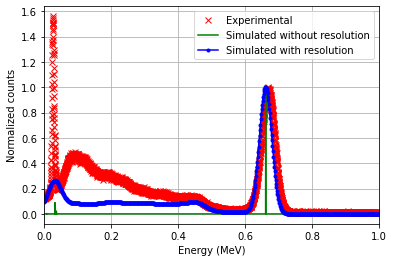

In [87]:
# comparison between experimental data, simulated with R and simulated without-R
g1=np.histogram(cs_s['5cm'],bins=Energy)
plt.plot(Energy,cs_e['5cm'][2:]/max(cs_e['5cm'][2000:]), 'xr', label='Experimental')
plt.plot(Energy[:-1],g1[0]/max(g1[0]), '-g',label='Simulated without resolution')
plt.plot(data_s_smooth.iloc[0,0:1500],data_s_smooth.iloc[0,1500:]/max(data_s_smooth.iloc[0,1500:]),
         '.-b',label='Simulated with resolution')
plt.grid()
plt.xlabel('Energy (MeV)')
plt.ylabel('Normalized counts')
plt.xlim(0,1)
plt.legend()
plt.savefig('spectrum_com.jpg',dpi=300)

In [88]:
# determination of time in simulation to get coun rate spectrum
t_simulacion = lambda p, actividad: p/actividad
data_s_s=np.array(data_s_smooth)

In [89]:
f_correcion(eu_e_n, data_s_s[9:12,1501:], 'Eu-1')

array([9452.18327583, 8242.20718463, 7937.53028381])

In [90]:
# scale simulated spectra acording the activity of each radioative source
for i in range(3):
    data_s_s[i,1500:]=data_s_s[i,1500:]/t_simulacion(1e6,activi.iloc[0])
    data_s_s[i+3,1500:]=data_s_s[i+3,1500:]/t_simulacion(1e6,activi.iloc[2])
    data_s_s[i+6,1500:]=data_s_s[i+6,1500:]/t_simulacion(1e6,activi.iloc[3]*0.357)
    data_s_s[i+9,1500:]=data_s_s[i+9,1500:]/t_simulacion(1e6,activi.iloc[1]*0.2831)
    data_s_s[i+12,1500:]=data_s_s[i+12,1500:]/t_simulacion(1e6,activi.iloc[1]*0.0755)
    data_s_s[i+15,1500:]=data_s_s[i+15,1500:]/t_simulacion(1e6,activi.iloc[1]*0.2659)


In [91]:
f_correcion(eu_e_n, data_s_s[9:12,1501:], 'Eu-3')

array([248.75470723, 217.58321375, 209.88901252])

In [92]:
# determination of correction factor
b_cs=f_correcion(cs_e_n, data_s_s[0:3,1501:], 'Cs')
b_co_1=f_correcion(co_e_n, data_s_s[3:6,1501:], 'Co-1')
b_co_2=f_correcion(co_e_n, data_s_s[3:6,1501:], 'Co-2')
b_am=f_correcion(am_e_n, data_s_s[6:9,1501:], 'Am')
b_eu_1=f_correcion(eu_e_n, data_s_s[9:12,1501:], 'Eu-1')
b_eu_2=f_correcion(eu_e_n, data_s_s[12:15,1501:], 'Eu-2')
b_eu_3=f_correcion(eu_e_n, data_s_s[15:18,1501:], 'Eu-3')
b_eu_1

array([73.45996743, 64.0563406 , 61.68846912])

In [93]:
# determine mean and deviation of each factor
b_am=[b_am.mean(),np.std(b_am)]
b_eu_1=[b_eu_1.mean(),np.std(b_eu_1)]
b_eu_2=[b_eu_2.mean(),np.std(b_eu_2)]
b_eu_3=[b_eu_3.mean(),np.std(b_eu_3)]
b_cs=[b_cs.mean(),np.std(b_cs)]
b_co_1=[b_co_1.mean(),np.std(b_co_1)]
b_co_2=[b_co_2.mean(),np.std(b_co_2)]
# save the data in a matrix
fact_c=np.array([b_am,b_eu_1, b_eu_2,b_eu_3, b_cs,b_co_1,b_co_2])
fact_c

array([[3.94422791e+01, 5.16059036e-02],
       [6.64015924e+01, 5.08377796e+00],
       [9.46116480e+01, 8.64883086e+00],
       [1.42521481e+02, 2.57509326e+00],
       [2.01071480e+02, 3.02362200e+00],
       [3.08865406e+02, 3.15134587e+00],
       [3.24662001e+02, 1.25774994e+01]])

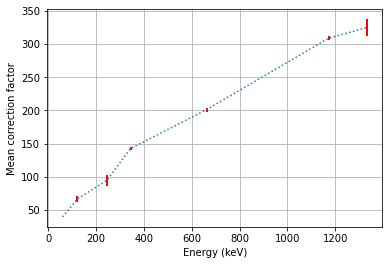

In [94]:
plt.errorbar(e_cab,fact_c[:,0], yerr=fact_c[:,1],ecolor='Red', fmt=":",elinewidth=2)
plt.grid()
plt.xlabel("Energy (keV)")
plt.ylabel("Mean correction factor")
plt.savefig('f_correction.jpg', dpi=300)

Calculate FEPE simulated

In [95]:
# scale up the simulated spectra with correction factor
for i in range(3):
    # cesium
    data_s_s[i,1500:]=data_s_s[i,1500:]/fact_c[4,0]
    # first peak cobalt
    data_s_s[i+3,1500:1500+940]=data_s_s[i+3,1500:1500+940]/fact_c[5,0]
    data_s_s[i+3,1500+940:]=data_s_s[i+3,1500+940:]/fact_c[6,0]
    # americium
    data_s_s[i+6,1500:]=data_s_s[i+6,1500:]/fact_c[0,0]
    # europium first data
    data_s_s[i+9,1500:]=data_s_s[i+9,1500:]/fact_c[1,0]
    # europium second data
    data_s_s[i+12,1500:]=data_s_s[i+12,1500:]/fact_c[2,0]
    # europium second data
    data_s_s[i+15,1500:]=data_s_s[i+15,1500:]/fact_c[3,0]

Once the spectra were scaled up, it's going to be determined the FEPE simulated

In [96]:
# save the FEPE simulated in a matrix
# the column is another isotope
# the row is the distance
eficiencia_sim=np.zeros((3,7))
area_sim=np.zeros((3,7))
# first the americium
for i in range(3):
    # add area of americium
    area_sim[i,0]=np.array([area(data_s_s[i+6,1500:],data_s_s[i+6,:1500],30,55)])
    # add first peak of Eu
    area_sim[i,1]=np.array([area(data_s_s[i+9,1500:],data_s_s[i+9,:1500],60,120)])
    # add second peak of Eu
    area_sim[i,2]=np.array([area(data_s_s[i+12,1500:],data_s_s[i+12,:1500],150,210)])
    # add third peak of Eu
    area_sim[i,3]=np.array([area(data_s_s[i+15,1500:],data_s_s[i+15,:1500],220,290)])
    # add the peak of Cs
    area_sim[i,4]=np.array([area(data_s_s[i,1500:],data_s_s[i,:1500],460,540)])
    # add the first peak of Co
    area_sim[i,5]=np.array([area(data_s_s[i+3,1500:],data_s_s[i+3,:1500],840,920)])
    # add the second peak of Co
    area_sim[i,6]=np.array([area(data_s_s[i+3,1500:],data_s_s[i+3,:1500],840,920)])

In [97]:
# determinate FEPE
for j in range(len(cuentas_t)):
    for i in range(area_sim.shape[0]):
        eficiencia_sim[i,j]=(area_sim[i,j]/cuentas_t[j])*100

In [98]:
# determinate the error between simulated and experimental FEPE
error=np.zeros((3,7))
for i in range(3):
    for j in range(7):
        error[i,j]=(np.abs(eficiencia[i,j]-eficiencia_sim[i,j]))/(eficiencia[i,j])*100
error_df=pd.DataFrame(error,columns=("Am-241 59 keV","Eu-152 121 keV", "Eu-152 244 keV", "Eu-152 344 keV", "Cs-137 662 keV", "Co-60 1.17 MeV", "Co-60 1.33 MeV"), index=('5 cm', '10 cm', '15 cm'))
error_df

,Am-241 59 keV,Eu-152 121 keV,Eu-152 244 keV,Eu-152 344 keV,Cs-137 662 keV,Co-60 1.17 MeV,Co-60 1.33 MeV
5 cm,4.777142,10.694373,11.060380,2.551565,2.589714,14.586054,2.569365
10 cm,4.401452,1.387955,4.340275,4.447298,3.261595,13.577538,3.588169
15 cm,5.181255,6.374269,9.789713,3.712686,2.971151,12.866439,4.077558


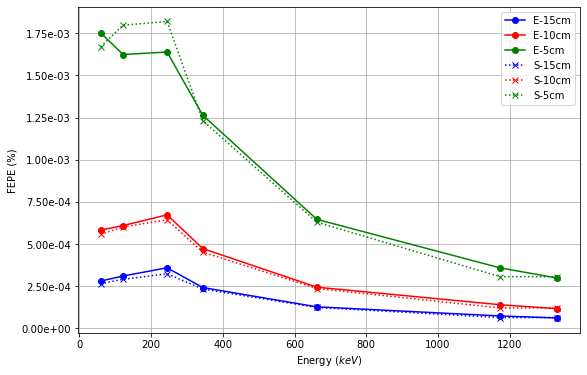

In [99]:
#figure between experimental and simulated FEPE
fig2=plt.figure(figsize=(9,6))
ax2=plt.axes()
ax2.plot(e_cab,eficiencia[2,:],'o-b', label='E-15cm')
ax2.plot(e_cab,eficiencia[1,:],'o-r', label='E-10cm')
ax2.plot(e_cab,eficiencia[0,:],'o-g', label='E-5cm')
ax2.plot(e_cab,eficiencia_sim[2,:],'x:b', label='S-15cm')
ax2.plot(e_cab,eficiencia_sim[1,:],'x:r', label='S-10cm')
ax2.plot(e_cab,eficiencia_sim[0,:],'x:g', label='S-5cm')
plt.legend()
ax2.set_ylabel("FEPE (%)")
ax2.set_xlabel("Energy $(keV)$")
ax2.yaxis.set_major_formatter(mtick.FormatStrFormatter('%2.2e'))
#plt.title("Curva de calibración de eficiencias")
ax2.grid()
plt.savefig('fepe_curve.png',dpi=500)